In [75]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data

In [76]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [77]:
data = pd.read_csv('car_fuel_efficiency.csv')
data

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [78]:
df = data[['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']]
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


# Distribution of the fuel_efficiency_mpg

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

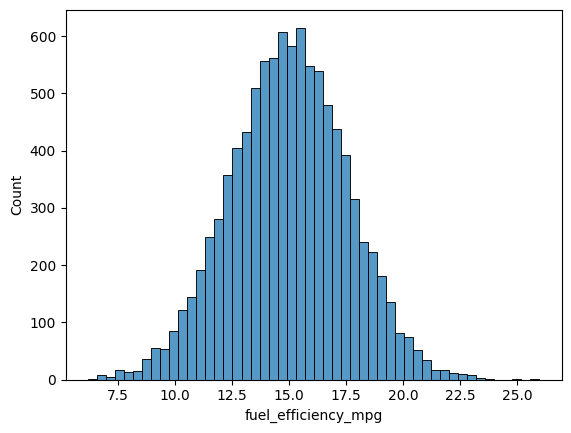

In [79]:
sns.histplot(df['fuel_efficiency_mpg'], bins=50)

# Question 1. Missing values

In [80]:
df.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

# Question 2. The median (50% percentile) for variable 'horsepower'

In [81]:
df['horsepower'].describe()

count    8996.000000
mean      149.657292
std        29.879555
min        37.000000
25%       130.000000
50%       149.000000
75%       170.000000
max       271.000000
Name: horsepower, dtype: float64

# Prepare and split the dataset

In [82]:
df

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


In [83]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(1940, 1940, 5824)

In [84]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [85]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [86]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [87]:
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

In [88]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [89]:
df_test

,engine_displacement,horsepower,vehicle_weight,model_year
0,140,148.0,2704.826005,2017
1,210,136.0,3001.227490,2004
2,210,152.0,3747.467392,2021
3,190,128.0,2705.833636,2014
4,230,156.0,2505.939657,2005
...,...,...,...,...
1935,210,163.0,1972.029124,2011
1936,160,126.0,3011.588014,2009
1937,290,187.0,2440.508039,2019
1938,260,129.0,1865.404480,2019


# Question 3. How to deal with missing values

In [90]:
def train_linear_regression(X,y):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [91]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [92]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight']

In [93]:
# Filling missing values with 0

In [94]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.model_year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [95]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validate
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

0.52

In [96]:
# Filling missing values with mean

mean = df_train.horsepower.mean()
mean

149.54476367006487

In [97]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.model_year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X

In [98]:
# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

# validate
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

round(rmse(y_val, y_pred),2)

0.46

# Question 4. Train a regularized linear regression

In [99]:
def prepare_X(df):

    df = df.copy()
    features = base.copy()

    df['age'] = 2023 - df.model_year
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [100]:
def train_linear_regression_reg(X,y,r=0.001):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [101]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    
    # training
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    score = round(rmse(y_val, y_pred),5)

    print(r, w0, score)

0 29.52124004858506 0.51738
0.01 29.517902120860818 0.51737
0.1 29.4878947047306 0.51736
1 29.191142384448213 0.51874
5 27.94141348786696 0.55363
10 26.522088895081417 0.64076
100 13.85457568575574 2.05898


In [102]:
r = 0.1

# training
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

# validate
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = round(rmse(y_val, y_pred),2)
score

0.52

# Question 5. The value of std

In [103]:
results = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values
    
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    def prepare_X(df):

        df = df.copy()
        features = base.copy()
    
        df['age'] = 2023 - df.model_year
        features.append('age')
        
        df_num = df[features]
        df_num = df_num.fillna(0)
        X = df_num.values
        return X

    # training
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    results.append(result)
    
    print('seed', seed, '—', round(result,2))

seed 0 — 0.52
seed 1 — 0.52
seed 2 — 0.52
seed 3 — 0.52
seed 4 — 0.51
seed 5 — 0.53
seed 6 — 0.53
seed 7 — 0.51
seed 8 — 0.51
seed 9 — 0.51


In [104]:
np.std(results)

0.006989446427777865

# Question 6. RMSE on the test dataset

In [105]:
seed = 9    

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.seed(seed)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [106]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

y_full_train = np.concatenate([y_train, y_val])

In [107]:
X_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [108]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,4)

0.5156